# Data Exploration

In [64]:
import pandas as pd

In [65]:
# Load the dataset
dataset_path = r"C:\Users\kjson\Desktop\Job Applicant Evaluation Dataset.csv"
df = pd.read_csv(dataset_path)

In [66]:
# Display the first few rows of the dataset
print(df.head())

   Age Education Level  Years of Experience  Interview Performance  \
0   28      Bachelor's                  3.0                    8.0   
1   32        Master's                  7.0                    9.0   
2   24     High School                  1.0                    6.0   
3   45             PhD                 15.0                   10.0   
4   22      Bachelor's                  NaN                    7.0   

   Technical Skills Rating Hired  
0                      9.0   Yes  
1                      8.0   Yes  
2                      6.0    No  
3                      9.0   Yes  
4                      8.0    No  


In [67]:
# Get summary statistics of the dataset
print(df.describe())

             Age  Years of Experience  Interview Performance  \
count  48.000000            45.000000              41.000000   
mean   31.041667             6.022222               7.731707   
std     6.073866             3.762790               1.360595   
min    22.000000             1.000000               4.000000   
25%    26.750000             3.000000               7.000000   
50%    29.000000             5.000000               8.000000   
75%    35.250000             9.000000               9.000000   
max    45.000000            15.000000              10.000000   

       Technical Skills Rating  
count                44.000000  
mean                  7.659091  
std                   1.140036  
min                   5.000000  
25%                   7.000000  
50%                   8.000000  
75%                   9.000000  
max                   9.000000  


In [68]:
# Explore unique values in categorical columns
print("\nUnique values in 'Education Level' column:")
print(df['Education Level'].unique())


Unique values in 'Education Level' column:
["Bachelor's" "Master's" 'High School' 'PhD' nan]


# Data Cleaning

In [69]:
# Count the number of missing values in each column
print("\nMissing values count per column:")
print(df.isnull().sum())


Missing values count per column:
Age                        0
Education Level            5
Years of Experience        3
Interview Performance      7
Technical Skills Rating    4
Hired                      1
dtype: int64


In [70]:
# Assign the 'Hired' column as the target feature
y = df['Hired']

In [71]:
# Count occurrences of each value in the 'Hired' column
print("\nCount of 'Hired' values:")
print(y.value_counts())


Count of 'Hired' values:
Yes    33
No     14
Name: Hired, dtype: int64


In [72]:
# Impute missing values with the mean for numeric columns
numeric_columns = ['Years of Experience', 'Interview Performance', 'Technical Skills Rating']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [73]:
# Impute missing values with the most frequent value for categorical columns
categorical_columns = ['Education Level']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [74]:
# Count the number of missing values in each column again
print("\nMissing values count per column:")
print(df.isnull().sum())


Missing values count per column:
Age                        0
Education Level            0
Years of Experience        0
Interview Performance      0
Technical Skills Rating    0
Hired                      1
dtype: int64


In [75]:
# Drop rows with missing values in the 'Hired' column
df = df.dropna(subset=['Hired'])

In [76]:
# Count the number of missing values in each column
print("\nMissing values count per column:")
print(df.isnull().sum())


Missing values count per column:
Age                        0
Education Level            0
Years of Experience        0
Interview Performance      0
Technical Skills Rating    0
Hired                      0
dtype: int64


In [77]:
# Display the dataset after imputation
print("Dataset after imputing missing values:")
print(df)

Dataset after imputing missing values:
    Age Education Level  Years of Experience  Interview Performance  \
0    28      Bachelor's             3.000000               8.000000   
1    32        Master's             7.000000               9.000000   
2    24     High School             1.000000               6.000000   
3    45             PhD            15.000000              10.000000   
4    22      Bachelor's             6.022222               7.000000   
5    29        Master's             5.000000               7.731707   
6    36      Bachelor's             8.000000               9.000000   
7    31      Bachelor's             6.000000               7.000000   
9    40      Bachelor's            12.000000               9.000000   
10   29             PhD            10.000000               9.000000   
11   26      Bachelor's             2.000000               7.000000   
12   38        Master's             9.000000               7.731707   
13   33      Bachelor's             6.

# Data Visualization

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

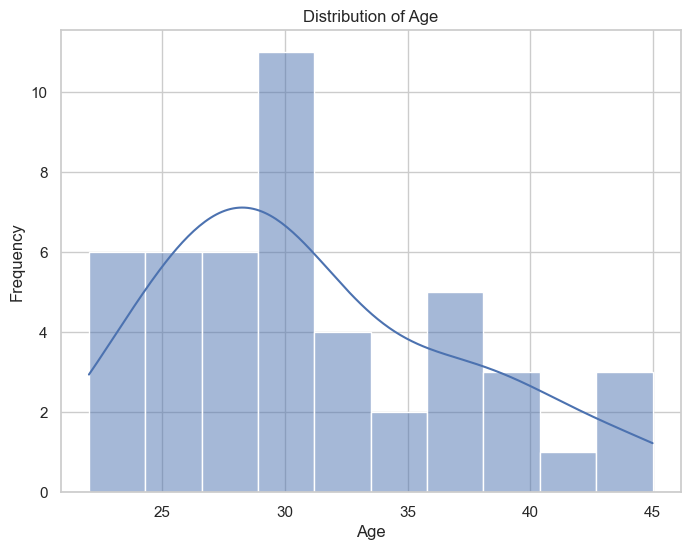

In [79]:
# Set style for Seaborn plots
sns.set(style="whitegrid")

# Create a histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", bins=10, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

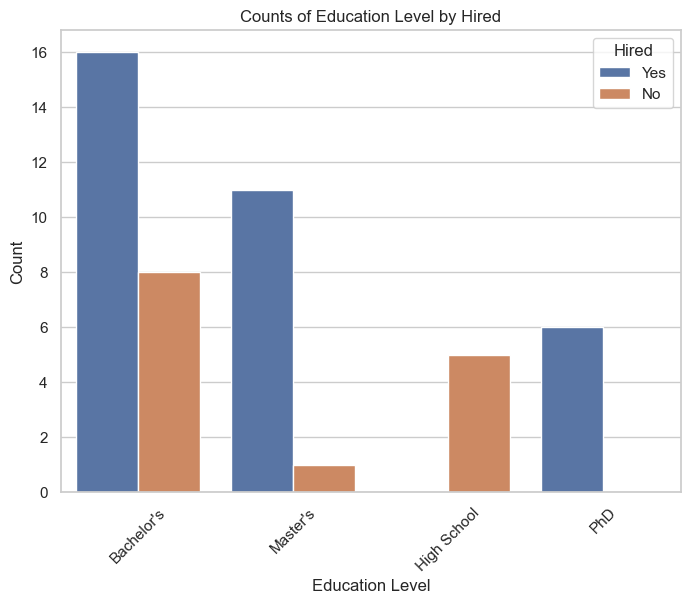

In [80]:
# Create a bar plot for Education Level
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Education Level", hue="Hired")
plt.title("Counts of Education Level by Hired")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Hired")
plt.show()

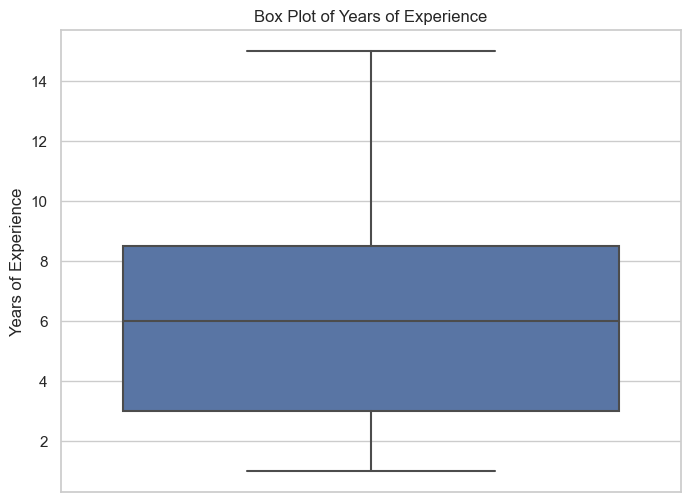

In [81]:
# Create a box plot for Years of Experience
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="Years of Experience")
plt.title("Box Plot of Years of Experience")
plt.ylabel("Years of Experience")
plt.show()

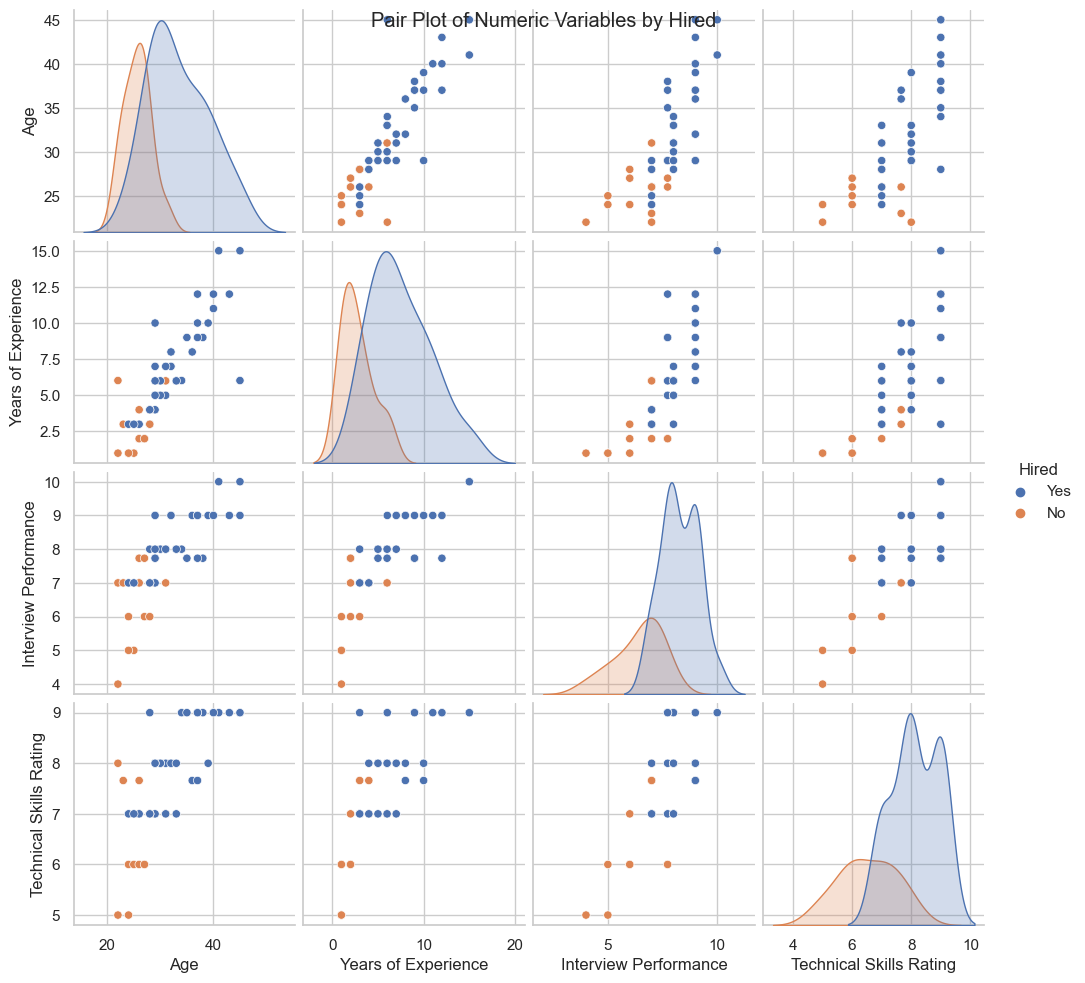

In [82]:
# Create a pair plot for numeric variables
sns.pairplot(df, hue="Hired")
plt.suptitle("Pair Plot of Numeric Variables by Hired")
plt.show()

# Machine Learning

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [84]:
# Split the dataset into features (X) and target (y)
X = df.drop('Hired', axis=1)
y = df['Hired']

In [85]:
# Convert categorical variables into numerical format using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
train_accuracies = {}
test_accuracies = {}

for model_name, model in models.items():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies[model_name] = train_accuracy
    
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies[model_name] = test_accuracy
    
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Parameters for {model_name}:")
    print(model.get_params())
    print("="*50)
    
    # Print the accuracies
print("Train Accuracies:")
for model_name, train_accuracy in train_accuracies.items():
    print(f"{model_name}: {train_accuracy:.2f}")

print("\nTest Accuracies:")
for model_name, test_accuracy in test_accuracies.items():
    print(f"{model_name}: {test_accuracy:.2f}")


Parameters for Logistic Regression:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Parameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Parameters for Naive Bayes:
{'priors': None, 'var_smoothing': 1e-09}
Parameters for K-Nearest Neighbors:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Train Accu

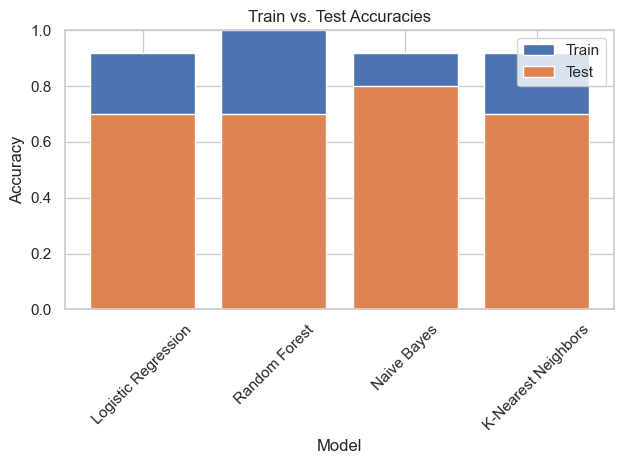

In [87]:


# Create a bar chart to visualize train and test accuracies
plt.bar(train_accuracies.keys(), train_accuracies.values(), label='Train')
plt.bar(test_accuracies.keys(), test_accuracies.values(), label='Test')
plt.title("Train vs. Test Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.legend()
plt.tight_layout()
plt.show()